# $$Análise ~Fatorial - PCA:$$

## $$Conceito:$$
    


Técnica Exploratória não supervisionada, que lida com variáveis metricas que possuem, entre si, consideráveis valores de correlação, a fim de se estabelecer nova(s) variável(is) que capture(m) o comportamento conjunto das variáveis originais


Pode-se entender a PCA como uma técnica que agrupa as variáveis(Matéria Prima: Correlação de Pearson), enquanto Clustering agrupa observações(Matéria Prima: Distância entre os pontos)


Uma das mais importantes características da PCA é que, todos as variáveis dentro dos componentes são relacionadas entre si, porém não relacionadas entre os componentes

Número máximo de fatores que pode ser extraído é igual a o número de variáveis utilizadas na análise 



- **Autovalores(eigenvalues)** = Variáveis independentes, advindos de uma matriz de correlação, que capturam o máximo da variabilidade dos dados. Pode-se entender, portanto, os autovalores como o total de variáveis capturadas, sempre o 1° componente vai capturar mais da variabilidade de cada variável.


- **Autovetores(eigenvectors)** = Os eigenvectors indicam o percentual capturado de cada variável, quanto maior o valor em modulo mais representativa é a variável para aquele componente, utilizados também para o cálculo dos scores fatoriais e das cargas fatoriais.


- **Score Fatorial** = Estabelece pesos para cada variável em razão da variância capturada sem cometer ponderação arbitraria

- **Fator** = Os fatores têm o objetivo de resumir as diversas variáveis em um conjunto menor de dimensões com uma perda mínima de informação


- **Cargas Fatoriais** = Correspondem às correlações de Pearson entre os fatores e as variáveis originais, utilizadas para a elaboração da PCA


- **Comunalidade** = Representam a variância total compartilhada de cada uma das variáveis originais com todos os fatores extraídos


### Temos 2 condições para se usar o PCA:

- As variáveis devem ser métricas

- Elas devem ter um alto grau de correlação entre si


## $$Critério~ da~ raiz~ latente$$

- **Critério da raiz latente diz respeito ao número de componentes que serão selecionados para PCA, e o valor do critério adotado é autovalores > 1, então todo componente que capturar no mínimo 1 variável vai ser considerado para uso na PCA**


## $$Como~ saber ~quando ~existe~ a~ possibilidade ~de~ se~ utilizar~ uma ~PCA?$$

**O primeiro passo é a construção da matriz de correlações (rho). Feito isso, a literatura costuma mencionar 3 métodos principais para responder à pergunta acima:**

- **Estatística Kaiser-Meyer-Olkin (KMO)** = Verifica se há adequabilidade dos dados para uma análise fatorial, varia entre 0 e 1, quanto maior o valor, melhor vai ser o resultado da PCA


- **Teste de esfericidade de Bartlett** = Verificar se a matriz de correlação é estatisticamente igual (Ho) ou diferente(H1) a uma matriz de identidade(Diagonais com valores = 1 e o resto da matriz com valores = 0) de mesma dimensão


- **Alpha de Cronbach**



# Objetivo: Fazer a redução de dimensionalidade dos dados e estabelecer um ranking dos melhores alunos

In [1]:
#Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Base de dados

In [2]:
# Carregando o dataset
dados = pd.read_csv('notasfatorial.csv',encoding='latin1',sep=',')
dados = dados.set_index('estudante')
dados

,notas_financas,notas_custos,notas_marketing,notas_atuarias
estudante,,,,
Gabriela,5.8,4.00,1.00,6.0
Luiz Felipe,3.1,3.00,10.00,2.0
Patrícia,3.1,4.00,4.00,4.0
Gustavo,10.0,8.00,8.00,8.0
Letícia,3.4,2.00,3.20,3.2
...,...,...,...,...
Sheila,7.7,4.33,5.16,5.1
Pedro,9.0,6.00,4.00,9.8
Horácio,9.3,6.00,7.00,7.0


**Temos 100 observações e 4 variáveis**

## Grafico 3D

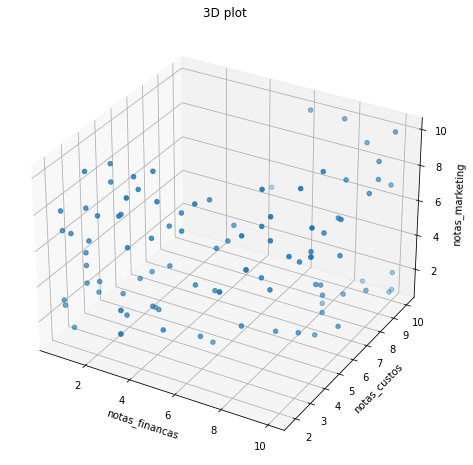

In [3]:
#Grafico 3D

#Variáveis
x = np.array(dados.notas_financas)
y = np.array(dados.notas_custos)
z = np.array(dados.notas_marketing)

#Tamanho dos gráficos
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

#Pontos no gráfico
ax.scatter3D(x, y, z)

#Labels
ax.set_title("3D plot")
ax.set_xlabel('notas_financas')
ax.set_ylabel('notas_custos')
ax.set_zlabel('notas_marketing')

plt.show()

**Note que fica muito difícil interpretar o gráfico 3D, vamos dividir as variáveis em 2 dimensões**

## Plot em 2D

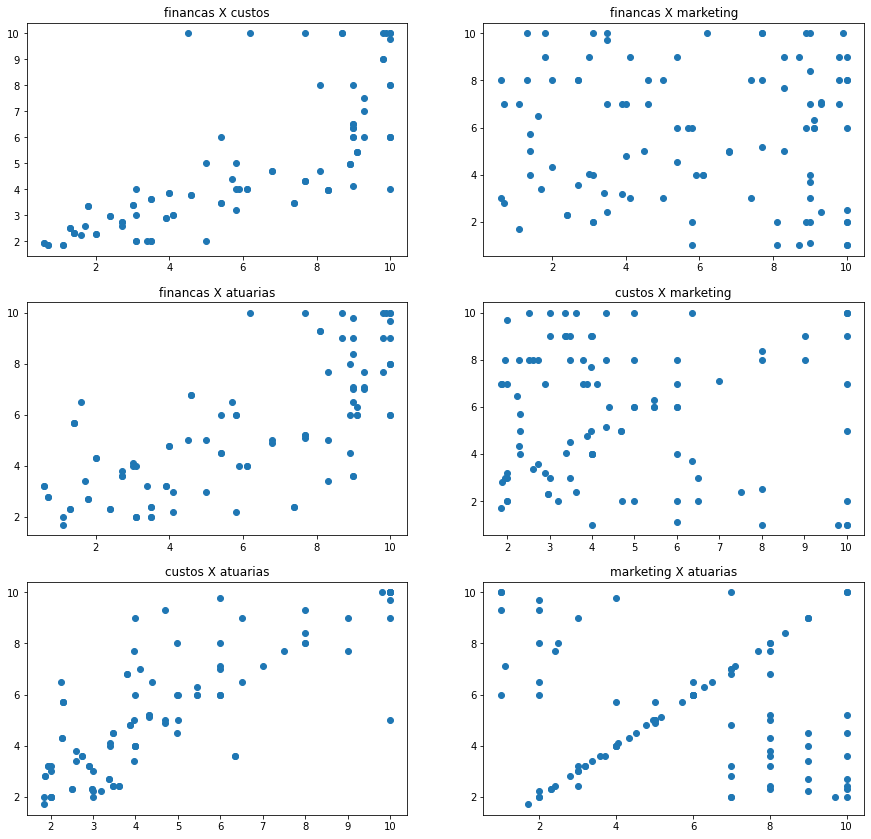

In [4]:
#Variáveis no formato array
x = np.array(dados.notas_financas)
y = np.array(dados.notas_custos)
z = np.array(dados.notas_marketing)
w = np.array(dados.notas_atuarias)


#Plot dos gráficos
plt.figure(figsize = (15, 8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=None, hspace=None)
plt.subplot(3, 2, 1)
plt.title('financas X custos')
plt.scatter(x,y);
plt.subplot(3, 2, 2)
plt.title('financas X marketing')
plt.scatter(x,z)
plt.subplot(3, 2, 3)
plt.title('financas X atuarias')
plt.scatter(x,w)
plt.subplot(3, 2, 4)
plt.title('custos X marketing')
plt.scatter(y,z)
plt.subplot(3, 2, 5)
plt.title('custos X atuarias')
plt.scatter(y,w)
plt.subplot(3, 2, 6)
plt.title('marketing X atuarias')
plt.scatter(z,w);

**Observe que temos variáveis correlacionadas e não correlacionadas, a PCA vai unir essas variáveis mais correlacionadas em fatores para ter uma melhor interpretabilidade dos dados**

## Testar a adequabilidade dos dados para utilizar PCA

## Matriz de correlação

<AxesSubplot:>

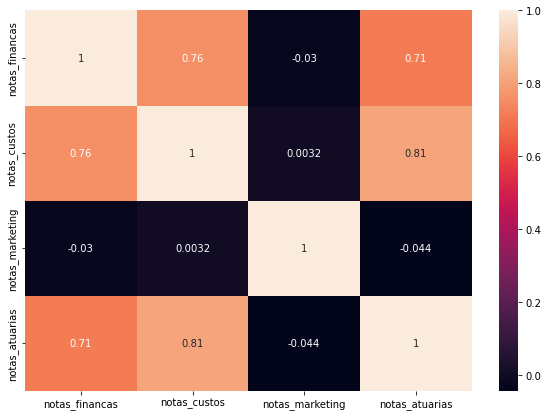

In [5]:
#Matriz
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(dados.corr(),annot = True)


**Observe que os valores de uma matriz de correlação tem mais facil interpretabilidade do que um gráfico scatter**

**OBS: As Nota de Marketing não tem correlação com nenhuma outra materia, provavelmente terá um fator exclusivo para ela**

## Estatística Kaiser-Meyer-Olkin (KMO)

- KMO é uma estatistica e não um teste estatistico

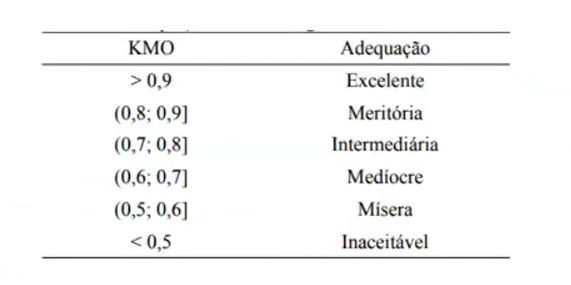

In [6]:
#Tabela KMO
from IPython.display import Image
Image(filename="KMO.png")

In [7]:
#Calculo do KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dados)

In [8]:
#KMO de cada variável
kmo_all

array([0.80371458, 0.68680937, 0.20277363, 0.73023231])

In [9]:
#Valor do KMO Total
kmo_model

0.7331061995145736

**O valor do KMO é considerável, visto que o valor entre 0.7 até 0.8 é intermediário, então pelo teste KMO há adequabilidade nos dados para usar PCA**

## Obs: Sempre quaisquer 2 variáveis o Valor do KMO será 0.5 - Inaceitável

In [10]:
#KMO
var_2 = dados.iloc[:,0:2]
kmo_all,kmo_model=calculate_kmo(var_2)
print('Correlação:')
print(var_2.corr(min_periods = 0).iloc[0:1,1:2])
print(f'\nValor do KMO: {kmo_model}')

Correlação:
                notas_custos
notas_financas      0.755923

Valor do KMO: 0.4949750012625625


**Note que mesmo a correlação sendo 0.75 entre as 2 variáveis, o teste de adequabilidade KMO apontou como inaceitável, portanto, o teste KMO não pode ser o único aceito para verificar a adequabilidade dos dados**

## Teste de esfericidade de Bartlett

- H0: >0.05,  Matriz identidade = Matriz de Correlação


- H1: <0.05, Matriz identidade != Matriz de Correlação

In [11]:
#Shape da matriz de correlação
dados.corr().shape

(4, 4)

In [12]:
#Matriz identidade
ma = np.diag([1,1,1,1])
print('Matriz identidade:')
print(ma)
print(f'\nShape: {ma.shape}')

Matriz identidade:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

Shape: (4, 4)


**Para fazer o teste de bartlett precisamos comparar a matriz de correlação com a matriz identidade de mesma dimensão e verificar se elas são estatisticamente iguais ou diferentes de 0**

In [59]:
#Teste de Bartlett
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(dados)
print('Teste da Esfericidade de Bartlett: chi² = %d,  p_value = %d' % (chi_square_value, p_value))

Teste da Esfericidade de Bartlett: chi² = 196,  p_value = 0


**P_value < 0.05, rejeita-se a hipótese nula de que as correlações entre os dados são estatisticamente iguais a 0, portanto há correlação**

# Fatores

- Para ter os fatores 1° precisa gerar os Scores Fatoriais

## Scores Fatoriais

- Para ter os Scores fatoriais 1° precisa calcular os Autovalores e Autovetores da matriz de correlação

## AutoValores e AutoVetores

In [14]:
#Calculo dos Autovalore e Autovetores
(auto_valores,auto_vetores) = np.linalg.eig(dados.corr())

## Auto valores

In [15]:
#Auto valores
Auto_valores_sort = sorted(auto_valores,reverse=True)
Auto_valores_sort

[2.5190526567139164, 1.0004080697941395, 0.29773205909984, 0.18280721439210387]

In [16]:
Auto_valores = pd.DataFrame(sorted(auto_valores,reverse=True),columns=['Auto_valores'])
Auto_valores['Componetes_Principais'] = ['PC1','PC2','PC3','PC4']
Auto_valores = Auto_valores.set_index('Componetes_Principais')
Auto_valores

,Auto_valores
Componetes_Principais,
PC1,2.519053
PC2,1.000408
PC3,0.297732
PC4,0.182807


**Os valores correspondem ao percentual capturado de variáveis, sendo que o 1° componente conseguiu capturar as variâncias de 2.51 variáveis**

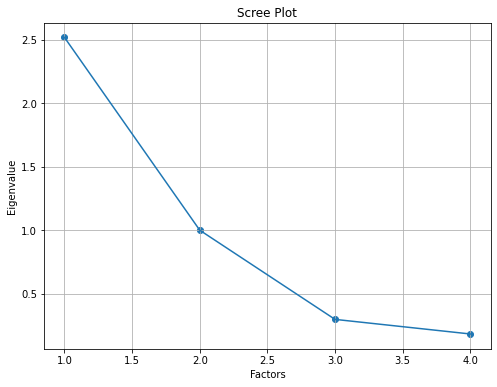

In [17]:
# Plot dos Autovalores 
plt.figure(figsize = (8, 6))
plt.scatter(range(1,dados.shape[1]+1),Auto_valores_sort)
plt.plot(range(1,dados.shape[1]+1),Auto_valores_sort)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

**Os 2 primeiros componentes são os que mais capturam a variabilidade dos dados**

In [18]:
#Soma dos Auto Valores
auto_valores.sum()

4.0

**A soma dos auto valores vai dar o número de variáveis analisadas**

In [19]:
#Auto valores em Percentual (Variância Compartilhada)
sorted(auto_valores/sum(auto_valores)*100,reverse=True)

[62.97631641784791, 25.01020174485349, 7.443301477496, 4.570180359802597]

In [20]:
#Variância cumulativa
np.cumsum(sorted(auto_valores/sum(auto_valores)*100,reverse=True))

array([ 62.97631642,  87.98651816,  95.42981964, 100.        ])

**Praticamente os 2 primeiros componentes está conseguindo capturar 88% de toda variância da base de dados**

In [21]:
#Overview dos resultados até o momento
AV = pd.DataFrame(sorted(auto_valores,reverse=True),columns=['Auto_valores'])
AV['Var_Compartilhada'] = sorted(auto_valores/sum(auto_valores)*100,reverse=True)
AV['Var_Cumulativa'] = np.cumsum(sorted(auto_valores/sum(auto_valores)*100,reverse=True))
AV['Componetes_Principais'] = ['PC1','PC2','PC3','PC4']
AV = AV.set_index('Componetes_Principais')
AV

,Auto_valores,Var_Compartilhada,Var_Cumulativa
Componetes_Principais,,,
PC1,2.519053,62.976316,62.976316
PC2,1.000408,25.010202,87.986518
PC3,0.297732,7.443301,95.429820
PC4,0.182807,4.570180,100.000000


## Auto vetores

- **Para cada um dos Auto Vetores vai ter o número total de auto valores**

In [22]:
#Auto vetores
Aut_vet = pd.DataFrame(auto_vetores,columns=['PC1','PC3','PC4','PC2'])
Aut_vet['Notas'] = dados.columns.values
Aut_vet = Aut_vet.set_index('Notas')
nova_ordem = ['PC1','PC2','PC3','PC4']
Aut_vet = Aut_vet[nova_ordem]
Aut_vet

,PC1,PC2,PC3,PC4
Notas,,,,
notas_financas,-0.564124,0.006728,-0.800695,-0.201511
notas_custos,-0.588711,0.048746,0.219796,0.776359
notas_marketing,0.026629,0.998737,0.000356,-0.042616
notas_atuarias,-0.578338,-0.010196,0.557294,-0.595688


**Os valores de cada eigenvectors indicam o percentual capturado de cada variável, quanto maior o valor mais representativa é a variável para aquele componente(Independente do sinal), no PC1 as variáveis 'Financas','Custos' e 'Atuarias são as mais significantes, já no PC2 é a variável 'Marketing'**

# Plot da captura de cada eigenvectors dentro dos componentes

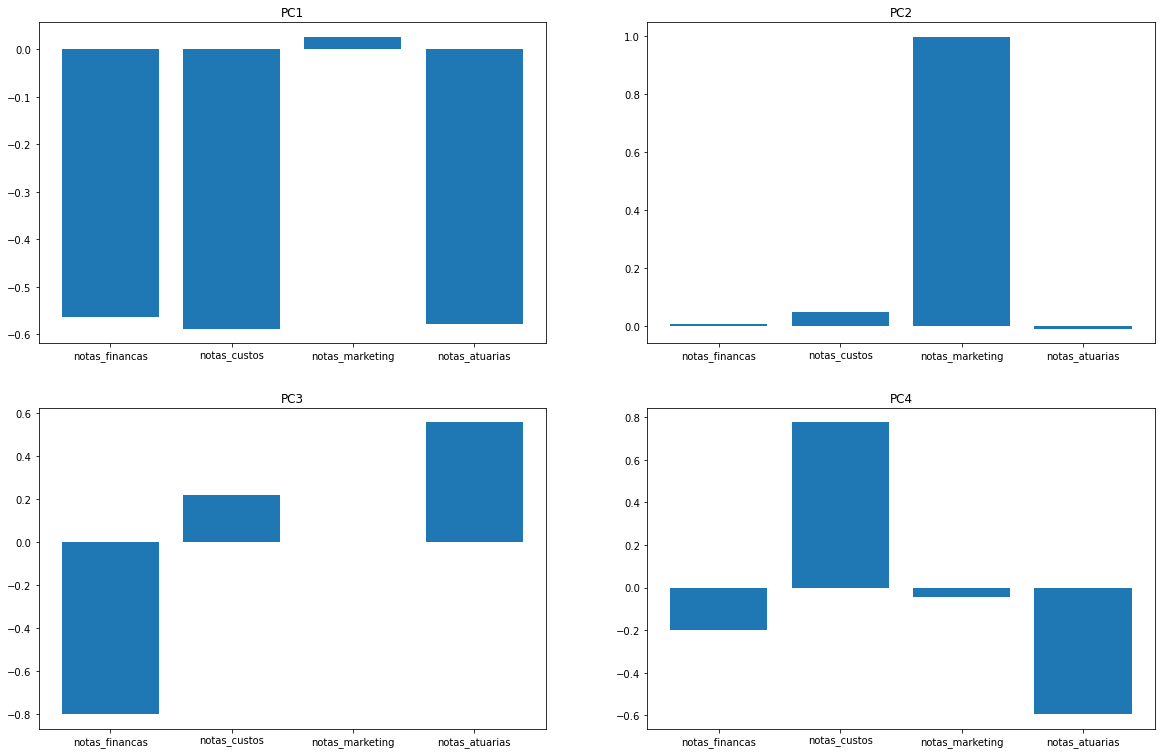

In [23]:
#Transformar os auto vetores em um dataframe
aa = pd.DataFrame(auto_vetores,columns=dados.columns)
aa

#Plot dos Autovetores
plt.figure(figsize = (20, 13))
plt.subplot(2, 2, 1)
plt.title('PC1')
plt.bar(aa.index,aa.iloc[:,0],tick_label=dados.columns[0:]);
plt.subplot(2, 2, 2)
plt.title('PC2')
plt.bar(aa.index,aa.iloc[:,3],tick_label=dados.columns[0:]);
plt.subplot(2, 2, 3)
plt.title('PC3')
plt.bar(aa.index,aa.iloc[:,1],tick_label=dados.columns[0:]);
plt.subplot(2, 2, 4)
plt.title('PC4')
plt.bar(aa.index,aa.iloc[:,2],tick_label=dados.columns[0:]);

**Visualizando os pesos que cada variável tem em cada componente, a correlação entre os componentes será sempre 0**

# Plot dos 2 principais componentes

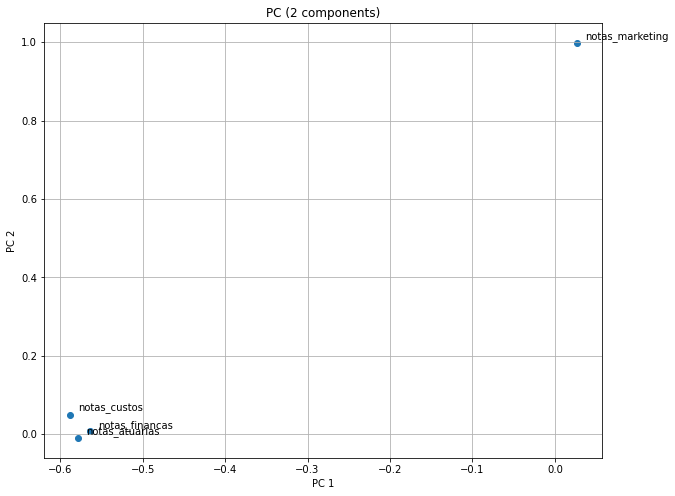

In [24]:
#Plotar os 2 Principais componentes dos Auto Vetores
fig, ax = plt.subplots(1,1, figsize=(10,8))

# Scatter plot
ax.scatter(Aut_vet['PC1'],Aut_vet['PC2'])

# Add as labels
for index, series in Aut_vet.iterrows():
    ax.text(series[0]+0.01,series[1]+0.01, index)
    
# Ajuste do plot
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('PC (2 components)')
#ax.set_xlim(-4,4.5)
#ax.set_ylim(-2,2)
ax.grid()

**Note que temos 3 variáveis que estão correlacionadas entre si ('Custo','Finanças' e 'Atuarias'), já as notas de marketing não tem correlação com as outras**

**OBS: Para a escolha do número de componentes usamos o critério da raiz latente e selecionamos os 2 primeiros componentes, assim poderíamos finalizar o miniprojeto aqui, porém para ordenar os estudantes através das melhores notas, temos que extrair os Scores fatoriais e criar o ranking**

# Calculando os Scores Fatoriais das variáveis

- Para calcular os Scores fatoriais dividimos a transposta dos Auto vetores pela raiz dos Auto valores


- Estabelece pesos para cada variável em razão da variância capturada sem cometer ponderação arbitraria


In [25]:
#Transposta dos Auto Vetores
Aut_vet.T

Notas,notas_financas,notas_custos,notas_marketing,notas_atuarias
PC1,-0.564124,-0.588711,0.026629,-0.578338
PC2,0.006728,0.048746,0.998737,-0.010196
PC3,-0.800695,0.219796,0.000356,0.557294
PC4,-0.201511,0.776359,-0.042616,-0.595688


In [26]:
# Raiz quadrada dos Auto Valores
np.sqrt(Auto_valores)

,Auto_valores
Componetes_Principais,
PC1,1.587152
PC2,1.000204
PC3,0.545648
PC4,0.427560


In [27]:
#Score fatorial das variáveis

score_fat = Aut_vet.T/np.sqrt(Auto_valores.values)
score_fat.index = [['Score_Fat_1','Score_Fat_2','Score_Fat_3','Score_Fat_4']]
score_fat

Notas,notas_financas,notas_custos,notas_marketing,notas_atuarias
Score_Fat_1,-0.355431,-0.370923,0.016778,-0.364387
Score_Fat_2,0.006726,0.048736,0.998533,-0.010194
Score_Fat_3,-1.467420,0.402816,0.000652,1.021343
Score_Fat_4,-0.471304,1.815791,-0.099673,-1.393229


**Score fatorial diz respeito a cada variável de cada componente do Auto Vetor, dividido pela raiz quadrada do seu respectivo Auto valor**

# Fatores

- Antes de calcular os fatores 1° precisa padronizar a base de dados

In [28]:
#Padronizar os dados
from sklearn.preprocessing import StandardScaler
dados_norm = StandardScaler().fit(dados)
dados_norm = pd.DataFrame(dados_norm.transform(dados),columns=dados.columns)
dados_norm.index = dados.index
dados_norm.head()

,notas_financas,notas_custos,notas_marketing,notas_atuarias
estudante,,,,
Gabriela,-0.010943,-0.292100,-1.658407,0.274347
Luiz Felipe,-0.879921,-0.700974,1.539447,-1.325345
Patrícia,-0.879921,-0.292100,-0.592456,-0.525499
Gustavo,1.340802,1.343398,0.828813,1.074193
Letícia,-0.783368,-1.109849,-0.876710,-0.845437


**Dados padronizados para criar os fatores**

# Calculando os Fatores

- Para calcular os fatores, precisamos multiplicar cada componente de cada uma das variáveis do score fatorial por cada dado padronizado da mesma variável por observação


- Se temos 4 Scores fatoriais teremos 4 Fatores


- Resumindo: Cada Fator será a multiplicação dos dados de uma observação pelos numeros de Scores Fatoriais

In [29]:
#Fatores (Score Fatorial X Dados Padronizados)
fator = pd.DataFrame(np.dot(dados_norm.values, score_fat.T.values),columns=['FT1','FT2','FT3','FT4'])
fator['Estudantes'] = dados.index
fator = fator.set_index('Estudantes')
fator

,FT1,FT2,FT3,FT4
Estudantes,,,,
Gabriela,-0.015557,-1.673080,0.177517,-0.742165
Luiz Felipe,1.081527,1.510618,-0.343779,0.834955
Patrícia,0.602643,-0.606384,0.636451,0.675510
Gustavo,-1.352376,0.891137,-0.328718,0.228197
Letícia,0.983459,-0.926163,-0.161587,-0.380777
...,...,...,...,...
Sheila,-0.126999,-0.182771,-1.032114,-0.431230
Pedro,-1.220815,-0.577404,0.548461,-1.966247
Horácio,-0.829214,0.499049,-0.736214,-0.557884


**Criamos os fatores para cada componente, porém usaremos os 2 principais Fatores para criar o ranking, que já explica 88% da variabilidade dos dados**

**OBS: Antes de criar o ranking, vamos verificar as Cargas Fatoriais e a Comunalidade**

# Cargas Fatoriais e Comunalidade

- Correlação entre as variáveis originais X Fatores


- Quanto maior a correlação em modulo, mais o fator conseguiu extrair a variabilidade daquela variável

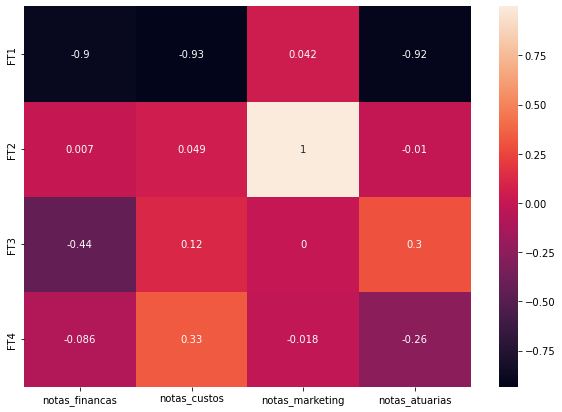

In [31]:
#Cargas Fatoriais 
cor_fat = dados_ft.corr()
cor_fat = cor_fat.iloc[4:,0:4]

#Heatmap

fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(round(cor_fat,3),annot = True);

In [32]:
#Eigenvalues, Somatorio dos quadrados das cargas fatorias  
cor_fat1 = cor_fat.copy()
cor_fat1 =round(cor_fat1**2,3)
cor_fat['eigenvalues'] = np.sum(cor_fat1,axis=1)
cor_fat

,notas_financas,notas_custos,notas_marketing,notas_atuarias,eigenvalues
FT1,-0.895350,-0.934374,0.042265,-0.917910,2.520
FT2,0.006729,0.048756,0.998940,-0.010198,1.000
FT3,-0.436898,0.119931,0.000194,0.304087,0.297
FT4,-0.086158,0.331940,-0.018221,-0.254692,0.182


**Somatorio dos quadrados das cargas fatorias = eigenvalues**

# Comunalidade

- Comunalidades são a soma das cargas fatoriais ao quadrado de cada variável medida.

In [63]:
#Calculo da comunalidade Total
comu_total = round(cor_fat.iloc[:,0:4].T**2,4)
comu_total['Comu_total_Variável'] = np.sum(round(comu_total,1),axis=1)
s = np.sum(comu_total,axis=0)
comu_total.loc['eigenvalues'] = s
comu_total.columns = [['FT1²','FT2²','FT3²','FT4²','Comu_total_Variável']]
comu_total

,FT1²,FT2²,FT3²,FT4²,Comu_total_Variável
notas_financas,0.8017,0.0000,0.1909,0.0074,1.0
notas_custos,0.8731,0.0024,0.0144,0.1102,1.0
notas_marketing,0.0018,0.9979,0.0000,0.0003,1.0
notas_atuarias,0.8426,0.0001,0.0925,0.0649,1.0
eigenvalues,2.5192,1.0004,0.2978,0.1828,4.0


**Cada valor representa a porcentagem da variável capturada naquele fator, observe que os fatores 3 e 4 capturam muito pouco da variabilidade das variáveis**

**OBS: Observe que somando cada fator ao quadrado, teremos o número de eigenvalues, e somando cada percentual de variável capturada, teremos o número de variáveis**

In [34]:
#Comunalidade dos 2 fatores principais
comu = comu_total.iloc[0:4,0:2]
comu['Comu_Variável'] = np.sum(round(comu,2),axis=1)
comu

,FT1,FT2,Comu_Variável
notas_financas,0.8017,0.0000,0.80
notas_custos,0.8731,0.0024,0.87
notas_marketing,0.0018,0.9979,1.00
notas_atuarias,0.8426,0.0001,0.84


In [35]:
#Porcentagem de cada fator
porcent1 = sorted(auto_valores/sum(auto_valores),reverse=True)[0:2]
print(f'Porcentagem Explicada dos 2 fatores principais: {porcent1}\n')
print(f'Porcentagem Explicada da soma dos 2 fatores principais: {sum(porcent1)}')

Porcentagem Explicada dos 2 fatores principais: [0.6297631641784791, 0.2501020174485349]

Porcentagem Explicada da soma dos 2 fatores principais: 0.879865181627014


**Quase que a variabilidade total é explicada pelos 2 primeiros fatores**

In [36]:
#Selecionar os 2 primeiros fatores
fator1 = fator.iloc[:,0:2]
fator1

,FT1,FT2
Estudantes,,
Gabriela,-0.015557,-1.673080
Luiz Felipe,1.081527,1.510618
Patrícia,0.602643,-0.606384
Gustavo,-1.352376,0.891137
Letícia,0.983459,-0.926163
...,...,...
Sheila,-0.126999,-0.182771
Pedro,-1.220815,-0.577404
Horácio,-0.829214,0.499049


**Para construção do ranking, vamos usar os 2 primeiros fatores**

# Ranking

- Usando os 2 primeiros fatores, podemos fazer um ranking dos melhores e piores alunos 


- O valor da pontuação do ranking é dado através da multiplicação do score fatorial pela sua respectiva porcentagem do eigenvalues


- Para construção do ranking as variáveis devem estar todas com o mesmo sentido de correlação


In [37]:
#Correlação
Aut_vet.iloc[:,0:2]

,PC1,PC2
Notas,,
notas_financas,-0.564124,0.006728
notas_custos,-0.588711,0.048746
notas_marketing,0.026629,0.998737
notas_atuarias,-0.578338,-0.010196


**Os 2 principais componentes(PC1 e PC2) extraídos da matriz de correlação para o cálculo do ranking estão com os valores invertidos, precisamos deixar as correlações da PC1 e PC2 com o mesmo sentido**

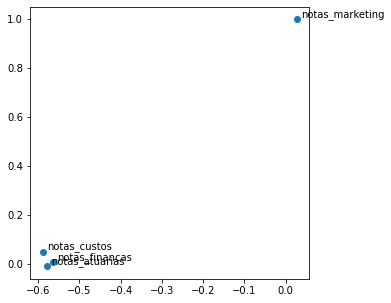

In [38]:
#Plotar os 2 Principais componentes dos Auto Vetores
fig, ax = plt.subplots(1,1, figsize=(5,5))

plt.scatter(Aut_vet.PC1,Aut_vet.PC2)
# Add as labels
for index, series in Aut_vet.iterrows():
    ax.text(series[0]+0.01,series[1]+0.01, index)
    


**Analisando a PC1 e a PC2(Dim1 e Dim2) para construção do ranking, repare que a nota_marketing é a única que esta positiva, e para a construção do ranking ela está melhorando o ranking de todos os alunos, já as outras notas estão negativas e piorando o ranking em relação a nota_marketing, por isso devemos multiplicar um dos Auto Vetores ou um dos Fatores por -1, para deixar todas as variáveis com o mesmo sentido na correlação, e para construção do ranking que todas as variáveis melhorem o ranking dos alunos**

In [43]:
#Invertendo o sinal de um dos fatores
fator2 = fator1.copy()
fator2['FT1'] = fator2.iloc[:,0]*-1
fator2

,FT1,FT2
Estudantes,,
Gabriela,0.015557,-1.673080
Luiz Felipe,-1.081527,1.510618
Patrícia,-0.602643,-0.606384
Gustavo,1.352376,0.891137
Letícia,-0.983459,-0.926163
...,...,...
Sheila,0.126999,-0.182771
Pedro,1.220815,-0.577404
Horácio,0.829214,0.499049


**Agora os 2 fatores estão com o mesmo sentido nas correlações**

In [46]:
#Base de dados originais + os fatores
base_total = dados.join(fator2)
base_total

,notas_financas,notas_custos,notas_marketing,notas_atuarias,FT1,FT2
estudante,,,,,,
Gabriela,5.8,4.00,1.00,6.0,0.015557,-1.673080
Luiz Felipe,3.1,3.00,10.00,2.0,-1.081527,1.510618
Patrícia,3.1,4.00,4.00,4.0,-0.602643,-0.606384
Gustavo,10.0,8.00,8.00,8.0,1.352376,0.891137
Letícia,3.4,2.00,3.20,3.2,-0.983459,-0.926163
...,...,...,...,...,...,...
Sheila,7.7,4.33,5.16,5.1,0.126999,-0.182771
Pedro,9.0,6.00,4.00,9.8,1.220815,-0.577404
Horácio,9.3,6.00,7.00,7.0,0.829214,0.499049


## Construção de um Ranking

- Criando um ranking pela soma dos fatores por sua variância compartilhada

In [51]:
#Variância Compartilhada
print(f'Variância Compartilhada Fator 1: {porcent1[0]}')
print(f'\nVariância Compartilhada Fator 2: {porcent1[1]}')

Variância Compartilhada Fator 1: 0.6297631641784791

Variância Compartilhada Fator 2: 0.2501020174485349


In [54]:
#Ranking 
import warnings
warnings.filterwarnings('ignore')
base_total['Ranking_Pontuacão'] = (fator2.iloc[:,0] * porcent1[0]) + (fator2.iloc[:,1] * porcent1[1])
base_total

,notas_financas,notas_custos,notas_marketing,notas_atuarias,FT1,FT2,Ranking_Pontuacão
estudante,,,,,,,
Gabriela,5.8,4.00,1.00,6.0,0.015557,-1.673080,-0.408643
Luiz Felipe,3.1,3.00,10.00,2.0,-1.081527,1.510618,-0.303297
Patrícia,3.1,4.00,4.00,4.0,-0.602643,-0.606384,-0.531180
Gustavo,10.0,8.00,8.00,8.0,1.352376,0.891137,1.074552
Letícia,3.4,2.00,3.20,3.2,-0.983459,-0.926163,-0.850982
...,...,...,...,...,...,...,...
Sheila,7.7,4.33,5.16,5.1,0.126999,-0.182771,0.034268
Pedro,9.0,6.00,4.00,9.8,1.220815,-0.577404,0.624415
Horácio,9.3,6.00,7.00,7.0,0.829214,0.499049,0.647021


**Multiplicamos cada fatores pelo suas porcentagens de variâncias capturadas pelas variáveis originais e somamos para extrair as pontuações e assim gerar o ranking** 

In [55]:
#Ranking em ordem decrescente
base_total.sort_values(by='Ranking_Pontuacão',ascending=False)

,notas_financas,notas_custos,notas_marketing,notas_atuarias,FT1,FT2,Ranking_Pontuacão
estudante,,,,,,,
Adelino,9.9,10.00,10.0,10.0,1.923789,1.632212,1.619751
Renata,7.7,10.00,10.0,10.0,1.672124,1.627449,1.460070
Cecília,9.8,10.00,7.0,10.0,1.930235,0.567608,1.357551
Felipe,8.7,10.00,9.0,9.0,1.646752,1.278895,1.356918
Giulia,6.2,10.00,10.0,10.0,1.500534,1.624202,1.351197
...,...,...,...,...,...,...,...
Ester,0.6,1.94,3.0,3.2,-1.311668,-1.004380,-1.077237
Carolina,3.1,2.00,2.0,2.0,-1.185495,-1.347676,-1.083638
Elaine,3.1,2.00,2.0,2.0,-1.185495,-1.347676,-1.083638


**Ranking das notas através das melhores pontuações**

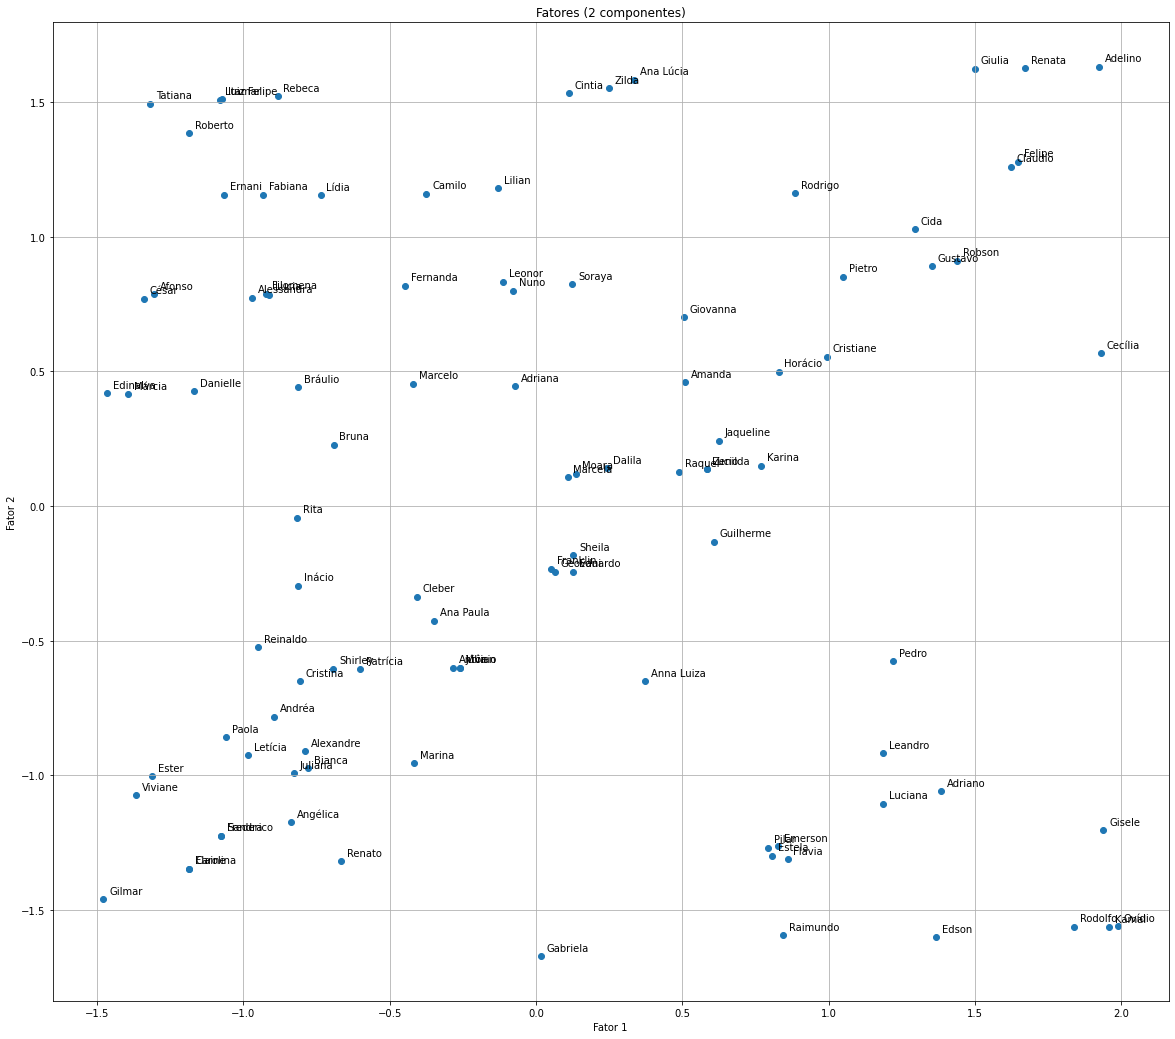

In [58]:
#Gerar o plot das observações
f = base_total[['FT1','FT2']]
f

#Plotar os 2 Componentes principais com os nomes dos alunos
fig, ax = plt.subplots(1,1, figsize=(20,18))

# Gerar o scatterplot
ax.scatter(f['FT1'],f['FT2'])

# Add as labels com os nomes dos alunos
for index, series in f.iterrows():
    ax.text(series[0]+0.02,series[1]+0.02, index)
    
# Ajuste do grid
ax.set_xlabel('Fator 1')
ax.set_ylabel('Fator 2')
ax.set_title('Fatores (2 componentes)')
#ax.set_xlim(-4,4.5)
#ax.set_ylim(-2,2)
ax.grid()

**Plotamos as observações em um scatter plot para ter uma visualização gráfica dos resultados obtidos com as pontuações**

# Conclusão:

**Primeiramente utilizamos a Analise de componentes principais(PCA) para reduzir o número de variáveis, antes aplicamos o método KMO e o teste de esfericidade de Bartlett para saber a adequabilidade dos dados(matriz de correlação é estatisticamente igual(Ho) ou diferente(H1) de uma matriz de identidade de mesma dimensão), após aplicar o método de redução de dimensionalidade chegamos à conclusão que 2 componentes seria o suficiente para explicar a variabilidade dos dados, e por último criamos um ranking através dos Fatores para saber os melhores e piores estudantes**